In [2]:
import comtradeapicall 
import sys
sys.path.append("..")

import pandas as pd
from module.mq_comtrade import MQ_COMTRADE
from module.util_plot import *
from module.common import *

subscription_key = ''
comTrade= MQ_COMTRADE(subscription_key)
print("从UN comTrade 获取数据比较缓慢，请耐心等待，如果无法访问，请考虑科学上网")

从UN comTrade 获取数据比较缓慢，请耐心等待，如果无法访问，请考虑科学上网


In [25]:
WorldCode = '0'
CHNCode= '156'
USACode= '842'
parentCmdCode = 84

years = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

total = comTrade.get_final_with_years(years, reporterCode=USACode, partnerCode=WorldCode, cmdArr=[], flowCode='M', freqCode='A')
total.index=total.period

In [24]:
year1 = str(years[0])
year2 = str(years[-1])
cmdCodes = comTrade.get_cmdcode_children(parent=parentCmdCod)
cmdArr = cmdCodes['id'].tolist()
df = comTrade.get_final_with_years(years, reporterCode=USACode, partnerCode=CHNCode, cmdArr=cmdArr, flowCode='M', freqCode='A')
df.index=df.period
ratio_db = pd.DataFrame()
median_value = df[df['period']==year1]['primaryValue'].median()
for cmd in cmdArr:
    dd = df[df['cmdCode']==f'{int(cmd):04d}']
    if len(dd)>0:
        if year1 not in dd.index:
            print(f"{year1} there is no trade in this period for {cmd}:{dd.iloc[0]['cmdDesc']}")
            continue
        if year2 not in dd.index:
            print(f"{year2} there is no trade in this period for {cmd}:{dd.iloc[0]['cmdDesc']}")
            continue
        if dd.loc[year1]['primaryValue']<median_value:  # skip values too small
            continue
        s={'cmdDesc':dd.iloc[0]['cmdDesc'], year1:dd.loc[year1]['primaryValue'], year2:dd.loc[year2]['primaryValue']}
        ratio_db = AppendSeries(ratio_db, pd.Series(s, name=cmd), ignore_index=False)
ratio_db['ratio'] = (ratio_db[year2] - ratio_db[year1]) /ratio_db[year1]
ratio_db = ratio_db.sort_values(by='ratio')
ratio_db.head(10)

2023 there is no trade in this period for 8469:Typewriters (other than printers of heading no. 8443) and word-processing machines
2014 there is no trade in this period for 8485:Machines for additive manufacturing


,cmdDesc,2014,2023,ratio
8443,Printing machinery; used for printing by means...,8675289444.0,1910625283.0,-0.779762
8472,Office machines; not elsewhere classified,386950634.0,114037221.0,-0.705293
8452,Sewing machines; other than book-sewing machin...,199355124.0,65828299.0,-0.669794
8407,Reciprocating or rotary internal combustion pi...,560124560.0,232631049.0,-0.58468
8451,Machinery (not of heading no. 8450) for washin...,236410733.0,116453599.0,-0.50741
8426,"Derricks, cranes, including cable cranes, mobi...",176295086.0,93937794.0,-0.467156
8450,Household or laundry-type washing machines; in...,960582185.0,552425583.0,-0.424905
8408,Compression-ignition internal combustion pisto...,128689699.0,75929095.0,-0.409983
8473,"Machinery; parts and accessories (not covers, ...",11068126411.0,6582724242.0,-0.405254
8432,"Agricultural, horticultural or forestry machin...",144180836.0,104097062.0,-0.27801


['8443', '8472', '8452', '8407', '8451']


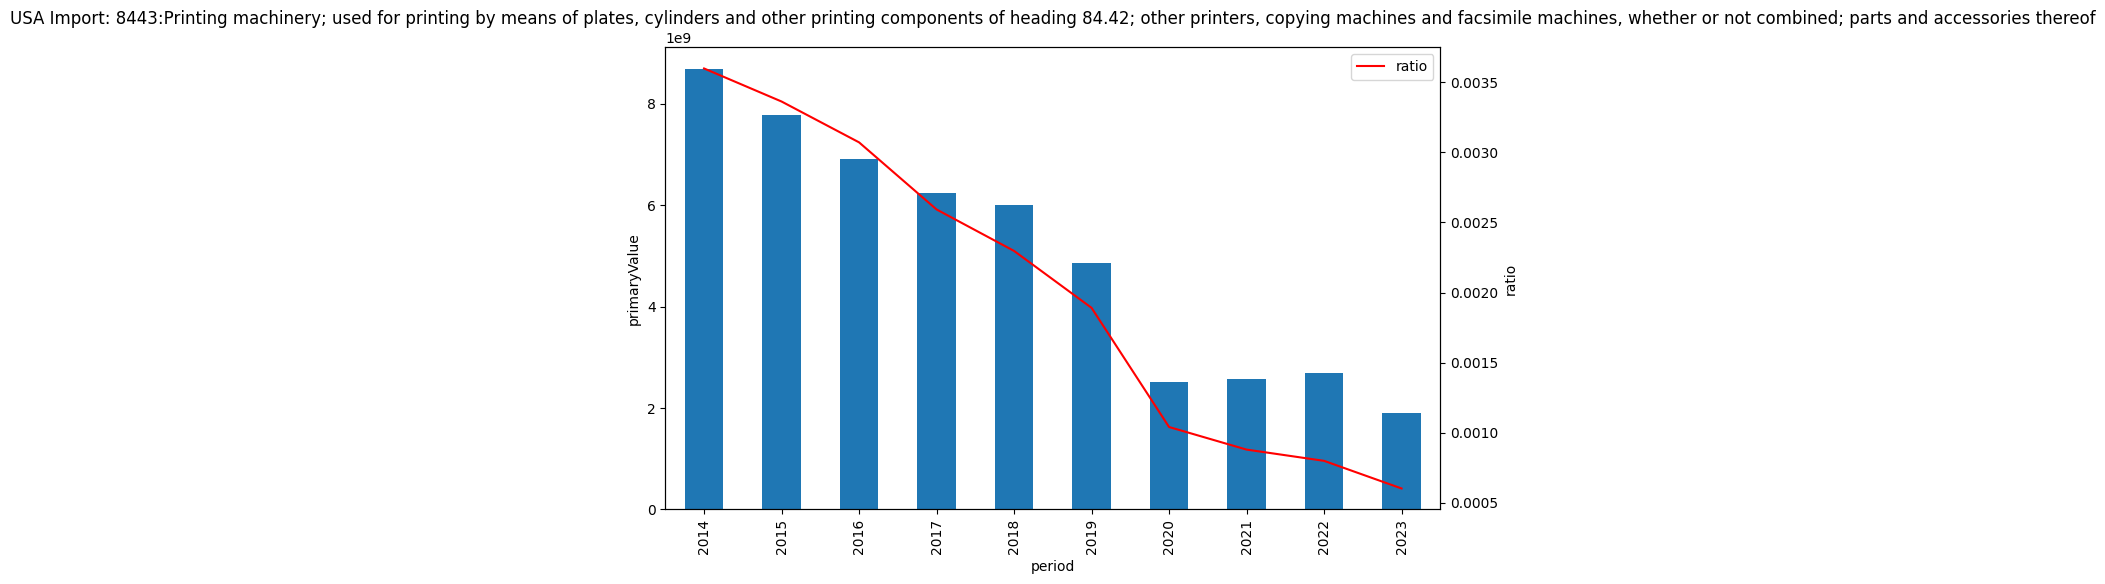

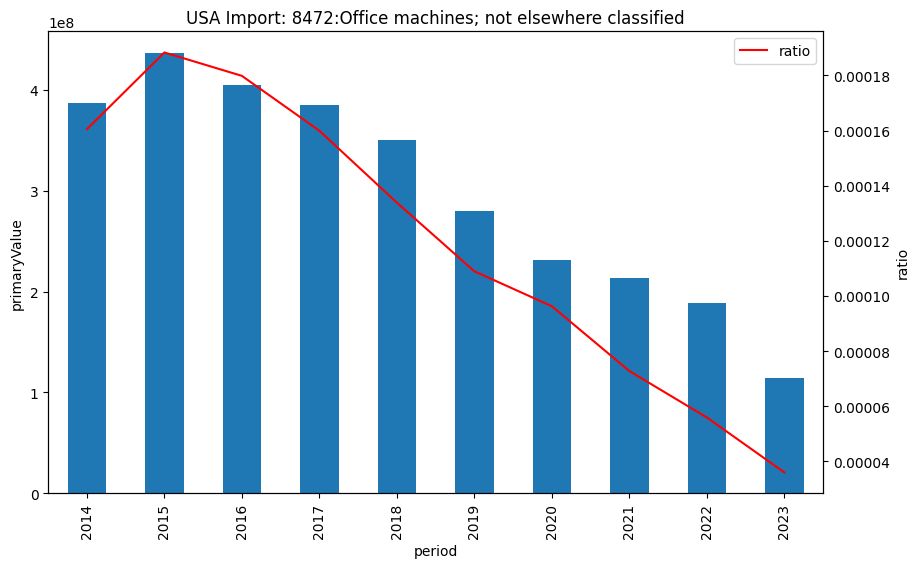

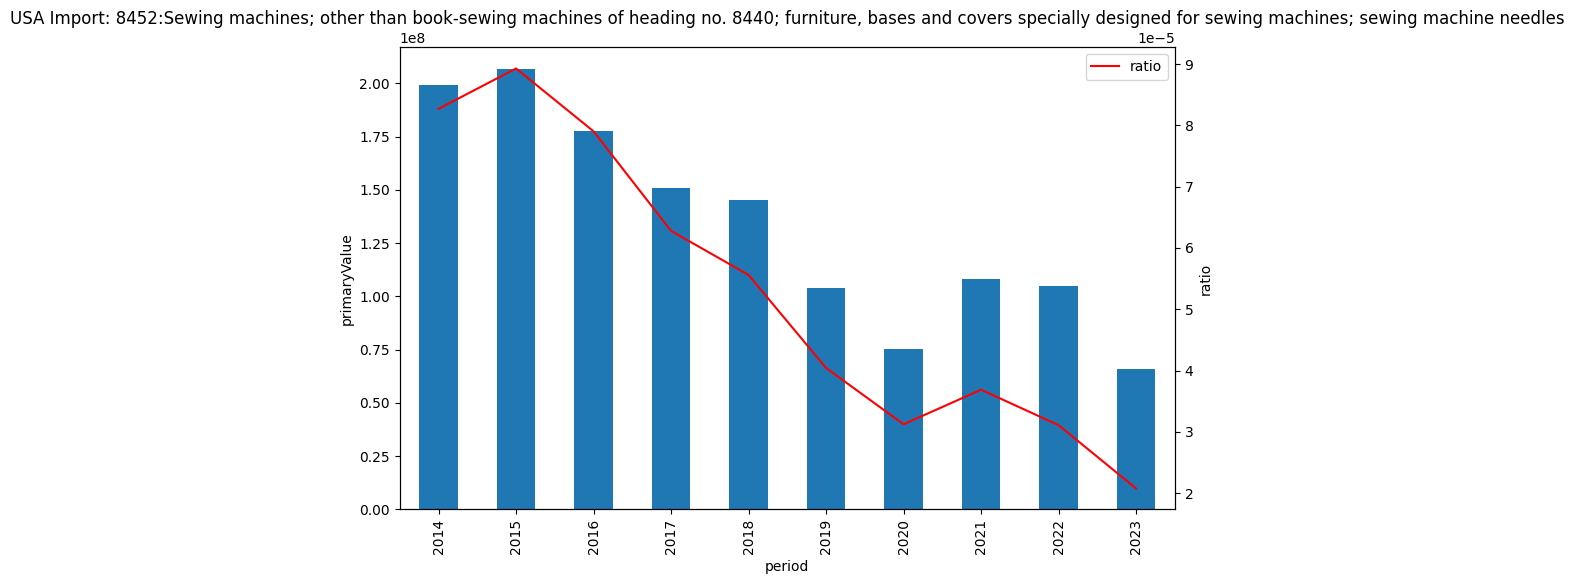

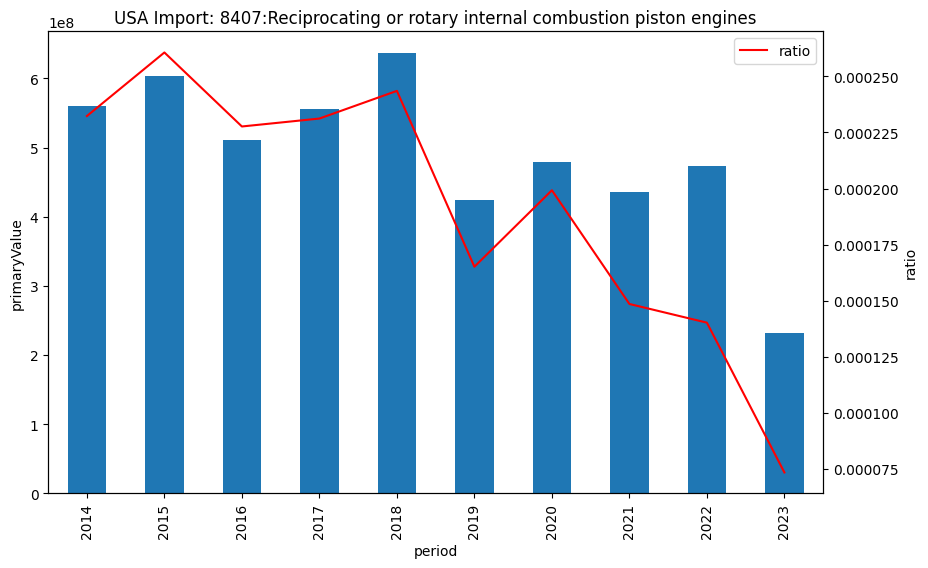

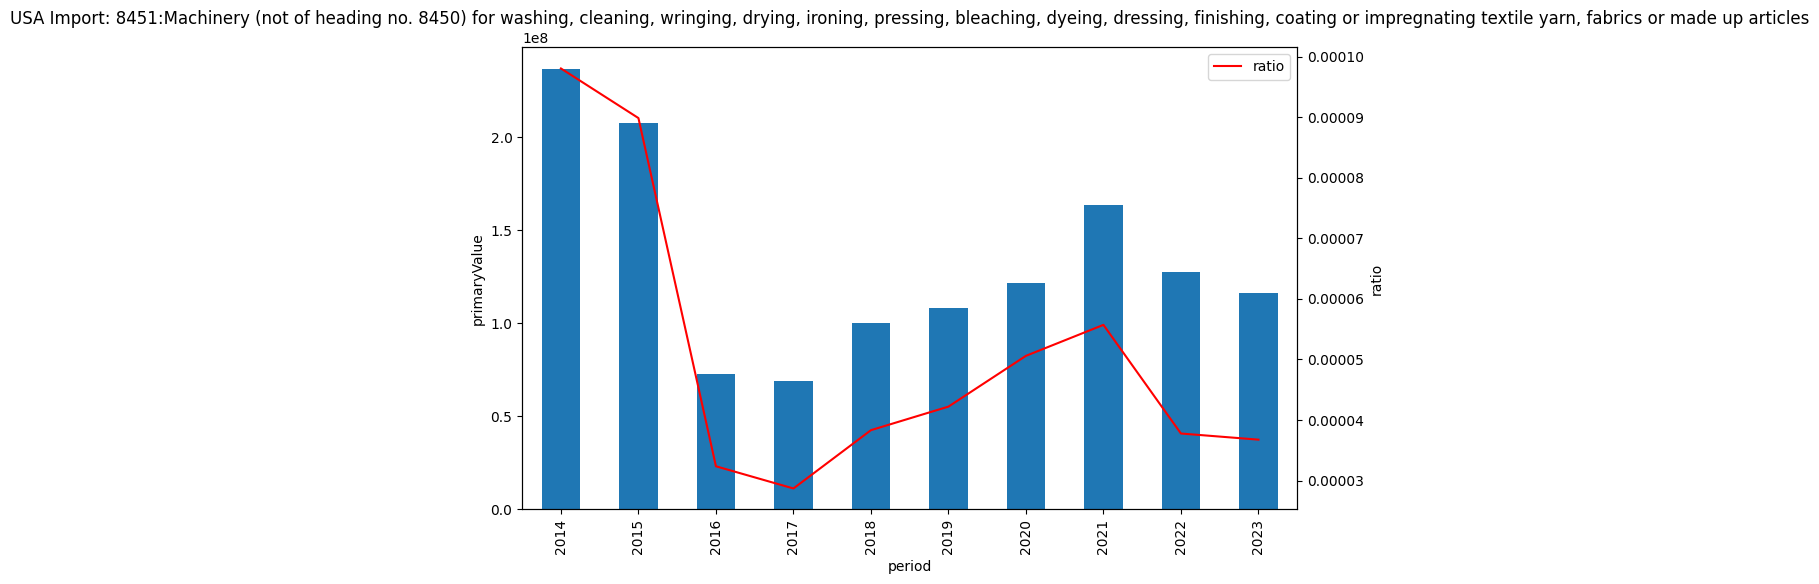

In [34]:
N = 5
for i in df.index:
    y = df.loc[i]['period']
    df.loc[i,'ratio'] = df.loc[i]['primaryValue']/total.loc[y]['primaryValue']
for cmd in ratio_db.head(N).index:
    dd = df[df['cmdCode']==f'{int(cmd):04d}']
    plot_bar_line(dd['primaryValue'], dd['ratio'], title=f"USA Import: {cmd}:{dd.iloc[0]['cmdDesc']}")
print(ratio_db.head(N).index.tolist())